# 02 - Modelos de Regressão Linear

Nessa aula, iremos tratar dos seguintes conteúdos:
- Introdução a Regressões
- Regressão Linear Simples
- Métricas de Regressões
- Regressão Linear Múltipla
- Variáveis Não Lineares

<img src="https://i.imgur.com/6mPgnyJ.png" width=500>

#####  

## Introdução a Regressões

O intuito do modelo de regressão linear é definirmos uma reta que melhor se ajusta aos dados. <br>
A seguir veremos casos de Regressão Linear Simples, Múltipla e Não Linear:

## 

## Regressão Linear Simples

Na regressão linear simples, temos o modelo como: $Y \approx \beta_0 + \beta_1 X$

#### Exemplo 1

In [8]:
#Import das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# criando um conjunto X de referencia
x = range(100)

# print x
print(x)

range(0, 100)


In [58]:
# Aqui criamos um conjunto de 50 pontos aleatórios
y = np.random.randint(low = 10, high = 40, size = 100)

# print y
print(y)

[23 16 28 16 18 28 18 25 25 13 20 23 30 25 36 30 22 29 30 21 33 15 10 37
 15 34 39 30 11 21 10 29 28 28 39 39 27 10 10 31 21 11 39 36 19 27 16 10
 29 37 31 38 36 39 17 26 33 28 33 34 33 22 24 18 38 17 34 13 12 35 21 27
 24 13 36 12 12 37 13 36 29 38 20 35 17 23 34 38 17 21 35 28 38 25 34 19
 32 26 26 22]


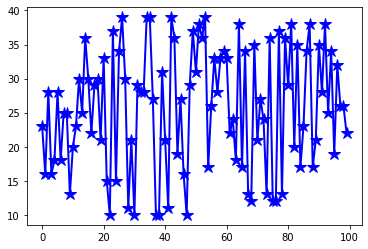

In [63]:
# Vamos ver como se distribuem esses pontos
plt.plot(x, y, 'b*-', linewidth=2, markersize=12)
plt.show()

Para se definir os valores de  $\hat{\beta}_0$ e $\hat{\beta}_1$ a partir do conjunto de dados, usaremos as seguintes relações matemáticas:

$$
\large
\begin{cases}
\hat{\beta}_1=\frac{\sum_{i=1}^n (x_i- \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} = \frac{\sigma_{xy}}{\sigma_{xx}} = \frac{covar(x, y)}{var(x)}\\
\hat{\beta}_0= \bar{y}-\hat{\beta_1}\bar{x}
\end{cases}
$$

Onde:
- **Covariância** ou variância conjunta, que indica o grau de interdependência entre duas variáveis;
- **Variância** é uam medida de o quão disperso está os dados, ou seja o quão distante está cada valor desse conjunto do valor médio;

In [12]:
def linear_regression(x, y): 
    # Definir as médias
    mean_x, mean_y = np.mean(x), np.mean(y)
    
    # Calcular a variancia e covariancia
    S_xy = 0
    S_xx = 0
    
    #looping para o somatorio
    for i in range(0, len(x)):
        # termo covariancia
        S_xy += (x[i] - mean_x)*(y[i] - mean_y)
        # termo variancia
        S_xx += (x[i] - mean_x)**2
  
    # Calcular os coeficientes de regressão
    b_1 = S_xy / S_xx
    b_0 = mean_y - b_1*mean_x
  
    # Retorna os coeficientes
    return b_0, b_1 

# Função para plotar os dados com a reta da regressão linear
def plot_regression_line(x, y, b): 
    # Calcula o y_pred
    y_pred = b[0] + b[1]*x
  
    # Plot dos Dados e da Reta
    plt.plot(x, y, 'bo')
    plt.plot(x, y_pred, color = 'r')
    plt.show()
    

Estimated coefficients:
b_0 = 23.533663366336633  
b_1 = 0.018511851185118507


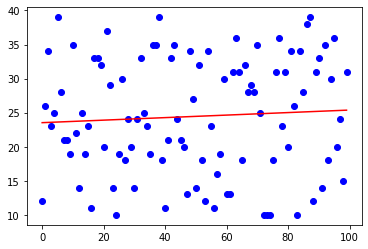

In [15]:
# Calcula os betas para dada regressão linear
b = linear_regression(x, y) 

# Print dos coeficientes
print("Estimated coefficients:\nb_0 = {}  \nb_1 = {}".format(b[0], b[1])) 
  
# Plot do gráfico
plot_regression_line(x, y, b) 

## 

## Métricas de Regressões

Alguma das métricas que podemos utilizar para quantificar a acurácia do modelo, usamos por exemplo raiz quadrada da média dos erros quadráticos RMSE (*root mean squared error*), erro quadrático médio MSE (*mean squared error*) e o erro absoluto médio MAE (*mean absolute error*):<br><br>
$$
RMSE = \sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}
$$

$$
MSE = {\frac{1}{n}\sum_{i=1}^n (y_i-\hat{y}_i)^2}
$$

$$
MAE = {\frac{1}{n}\sum_{i=1}^n |y_i-\hat{y}_i|}
$$

Outra medida importante é o coeficiente R2, que mede a proporção da variabilidade em Y que pode ser explicada a partir de X.<br><br>
$$
R^2 = 1-\frac{\sum_{i=1}^n (y_i-\hat{y}_i)^2}{\sum_{i=1}^n(y_i-\bar{y})^2}, \quad 0\leq R^2\leq 1
$$

In [11]:
# Cria uma função onde retorna todas as principais métricas para Regressão Linear
def linear_regression_metrics(x, y, b):
    # Definindo o tamanho de n
    n = len(y)

    # Inicializando RSE, MSE e MAE
    MSE = 0
    MAE = 0
    R2_num = 0
    R2_den = 0
    mean_y = np.mean(y)
    
    # Iterando para todos os valores de y
    for i in range(0, n):
        y_pred_i = b[0] + b[1]*x[i]
        diff_y = y[i] - y_pred_i
        MSE += diff_y**2
        MAE += np.abs(diff_y)
        R2_num += diff_y**2
        R2_den += (y[i] - mean_y)**2
     
    # Calculando as metricas de saida
    MSE = MSE/n
    RMSE = np.sqrt(MSE)
    MAE = MAE/n
    R2 = 1 - (R2_num / R2_den)
        
    # Retorna as metricas
    return RMSE, MSE, MAE, R2

In [12]:
# Calculo das metricas
RMSE, MSE, MAE, R2 = linear_regression_metrics(x, y, b)

# Print das métricas
print('Métricas: ')
print('RMSE: ', np.round(RMSE, 3))
print('MSE: ', np.round(MSE, 3))
print('MAE: ', np.round(MAE, 3))
print('R2:  ', np.round(R2, 3))

Métricas: 
RMSE:  8.437
MSE:  71.186
MAE:  7.17
R2:   0.002


#### Exemplo 2

In [13]:
# Cria um vetor x
x = np.arange(0, 20)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [14]:
# Cria uma vetor y de acordo com x
y = np.arange(0, 20)

linear_y = []
for i in range(0,20):
    valor_y = 0
    if y[i] % 2 == 0:
        valor_y = 1.5*y[i] - 1
    else:
        valor_y = y[i] + 1.5
    linear_y.append(valor_y)

               
linear_y = np.array(linear_y)
linear_y

array([-1. ,  2.5,  2. ,  4.5,  5. ,  6.5,  8. ,  8.5, 11. , 10.5, 14. ,
       12.5, 17. , 14.5, 20. , 16.5, 23. , 18.5, 26. , 20.5])

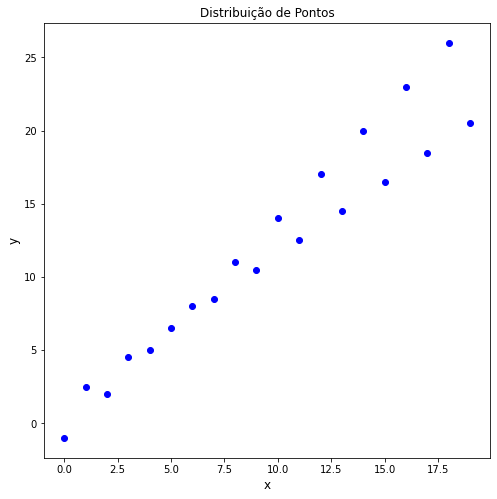

In [15]:
# Plotar os dados
plt.figure(figsize = (8,8))
plt.plot(x, linear_y, 'bo')
plt.title('Distribuição de Pontos', fontsize = 12)
plt.xlabel("x", fontsize = 12)
plt.ylabel("y", fontsize = 12)
plt.show() 

Estimated coefficients:
b_0 = 0.2857142857142865  
b_1 = 1.2330827067669172


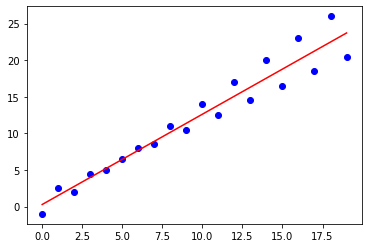

In [16]:
# Calcular os coeficientes
linear_b = linear_regression(x, linear_y) 

# Print dos coeficientes
print("Estimated coefficients:\nb_0 = {}  \nb_1 = {}".format(linear_b[0], linear_b[1])) 
  
# Plot o ajuste linear
plot_regression_line(x, linear_y, linear_b) 

In [17]:
# Calcula as metricas
RMSE_2, MSE_2, MAE_2, R2_2 = linear_regression_metrics(x, linear_y, linear_b)

# Print das metricas
print('Métricas: Exemplo 1 | Exemplo 2')
print('RMSE:          {} | {}'.format(np.round(RMSE, 3), np.round(RMSE_2, 3)))
print('MSE:          {} | {}'.format(np.round(MSE, 3), np.round(MSE_2, 3)))
print('MAE:          {} | {}'.format(np.round(MAE, 3), np.round(MAE_2, 3)))
print('R2:           {} | {}'.format(np.round(R2, 3), np.round(R2_2, 3)))

Métricas: Exemplo 1 | Exemplo 2
RMSE:          8.437 | 1.822
MSE:          71.186 | 3.319
MAE:          7.17 | 1.497
R2:           0.002 | 0.938


## 

## Regressão Linear Múltipla

Na regressão linear múltipla, temos o modelo como: $Y = \beta_0 + \beta_1 X_1  + \beta_2 X_2 + ... + \beta_n X_n$

#### Exemplo 3

Para o exemplo de Regressão Linear Múltipla, iremos utilizar o dataset *Car_Prices.csv*, onde o objetivo é estimar o preço dos carros a partir de suas características.

In [19]:
#Carregando o CSV
cars = pd.read_csv('./datasets/Car_Prices.csv', 
                   index_col = 0) # utilizar o car_ID como indice
# mostrar as primeiras linhas
cars.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,88.6,168.8,64.1,48.8,...,four,130,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,88.6,168.8,64.1,48.8,...,four,130,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,94.5,171.2,65.5,52.4,...,six,152,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,99.8,176.6,66.2,54.3,...,four,109,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,99.4,176.6,66.4,54.3,...,five,136,3.19,3.40,8.0,115,5500,18,22,17450.0


Vamos desenvolver um pouco da EDA (Análise Exploratória dos Dados):

In [20]:
# infos dos dados
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  cylindernumber    205 non-null    object 
 12  enginesize        205 non-null    int64  
 13  boreratio         205 non-null    float64
 14  stroke            205 non-null    float64
 15  compressionratio  205 non-null    float64
 16  horsepower        205 non-null    int64  
 1

In [22]:
# principais metricas do preço do carro
cars['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


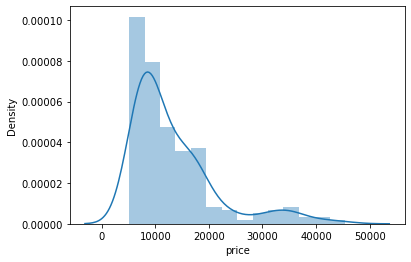

In [23]:
# plot distribuição dos preços
sns.distplot(cars['price'], kde = True)
plt.show()

In [26]:
# Top carros pelo preço
cars[['CarName', 'price']].sort_values(['price'], ascending = False)

,CarName,price
car_ID,,
75,buick regal sport coupe (turbo),45400.0
17,bmw x5,41315.0
74,buick century special,40960.0
129,porsche boxter,37028.0
18,bmw x3,36880.0
...,...,...
77,mitsubishi mirage,5389.0
151,toyota corona mark ii,5348.0
51,maxda rx3,5195.0


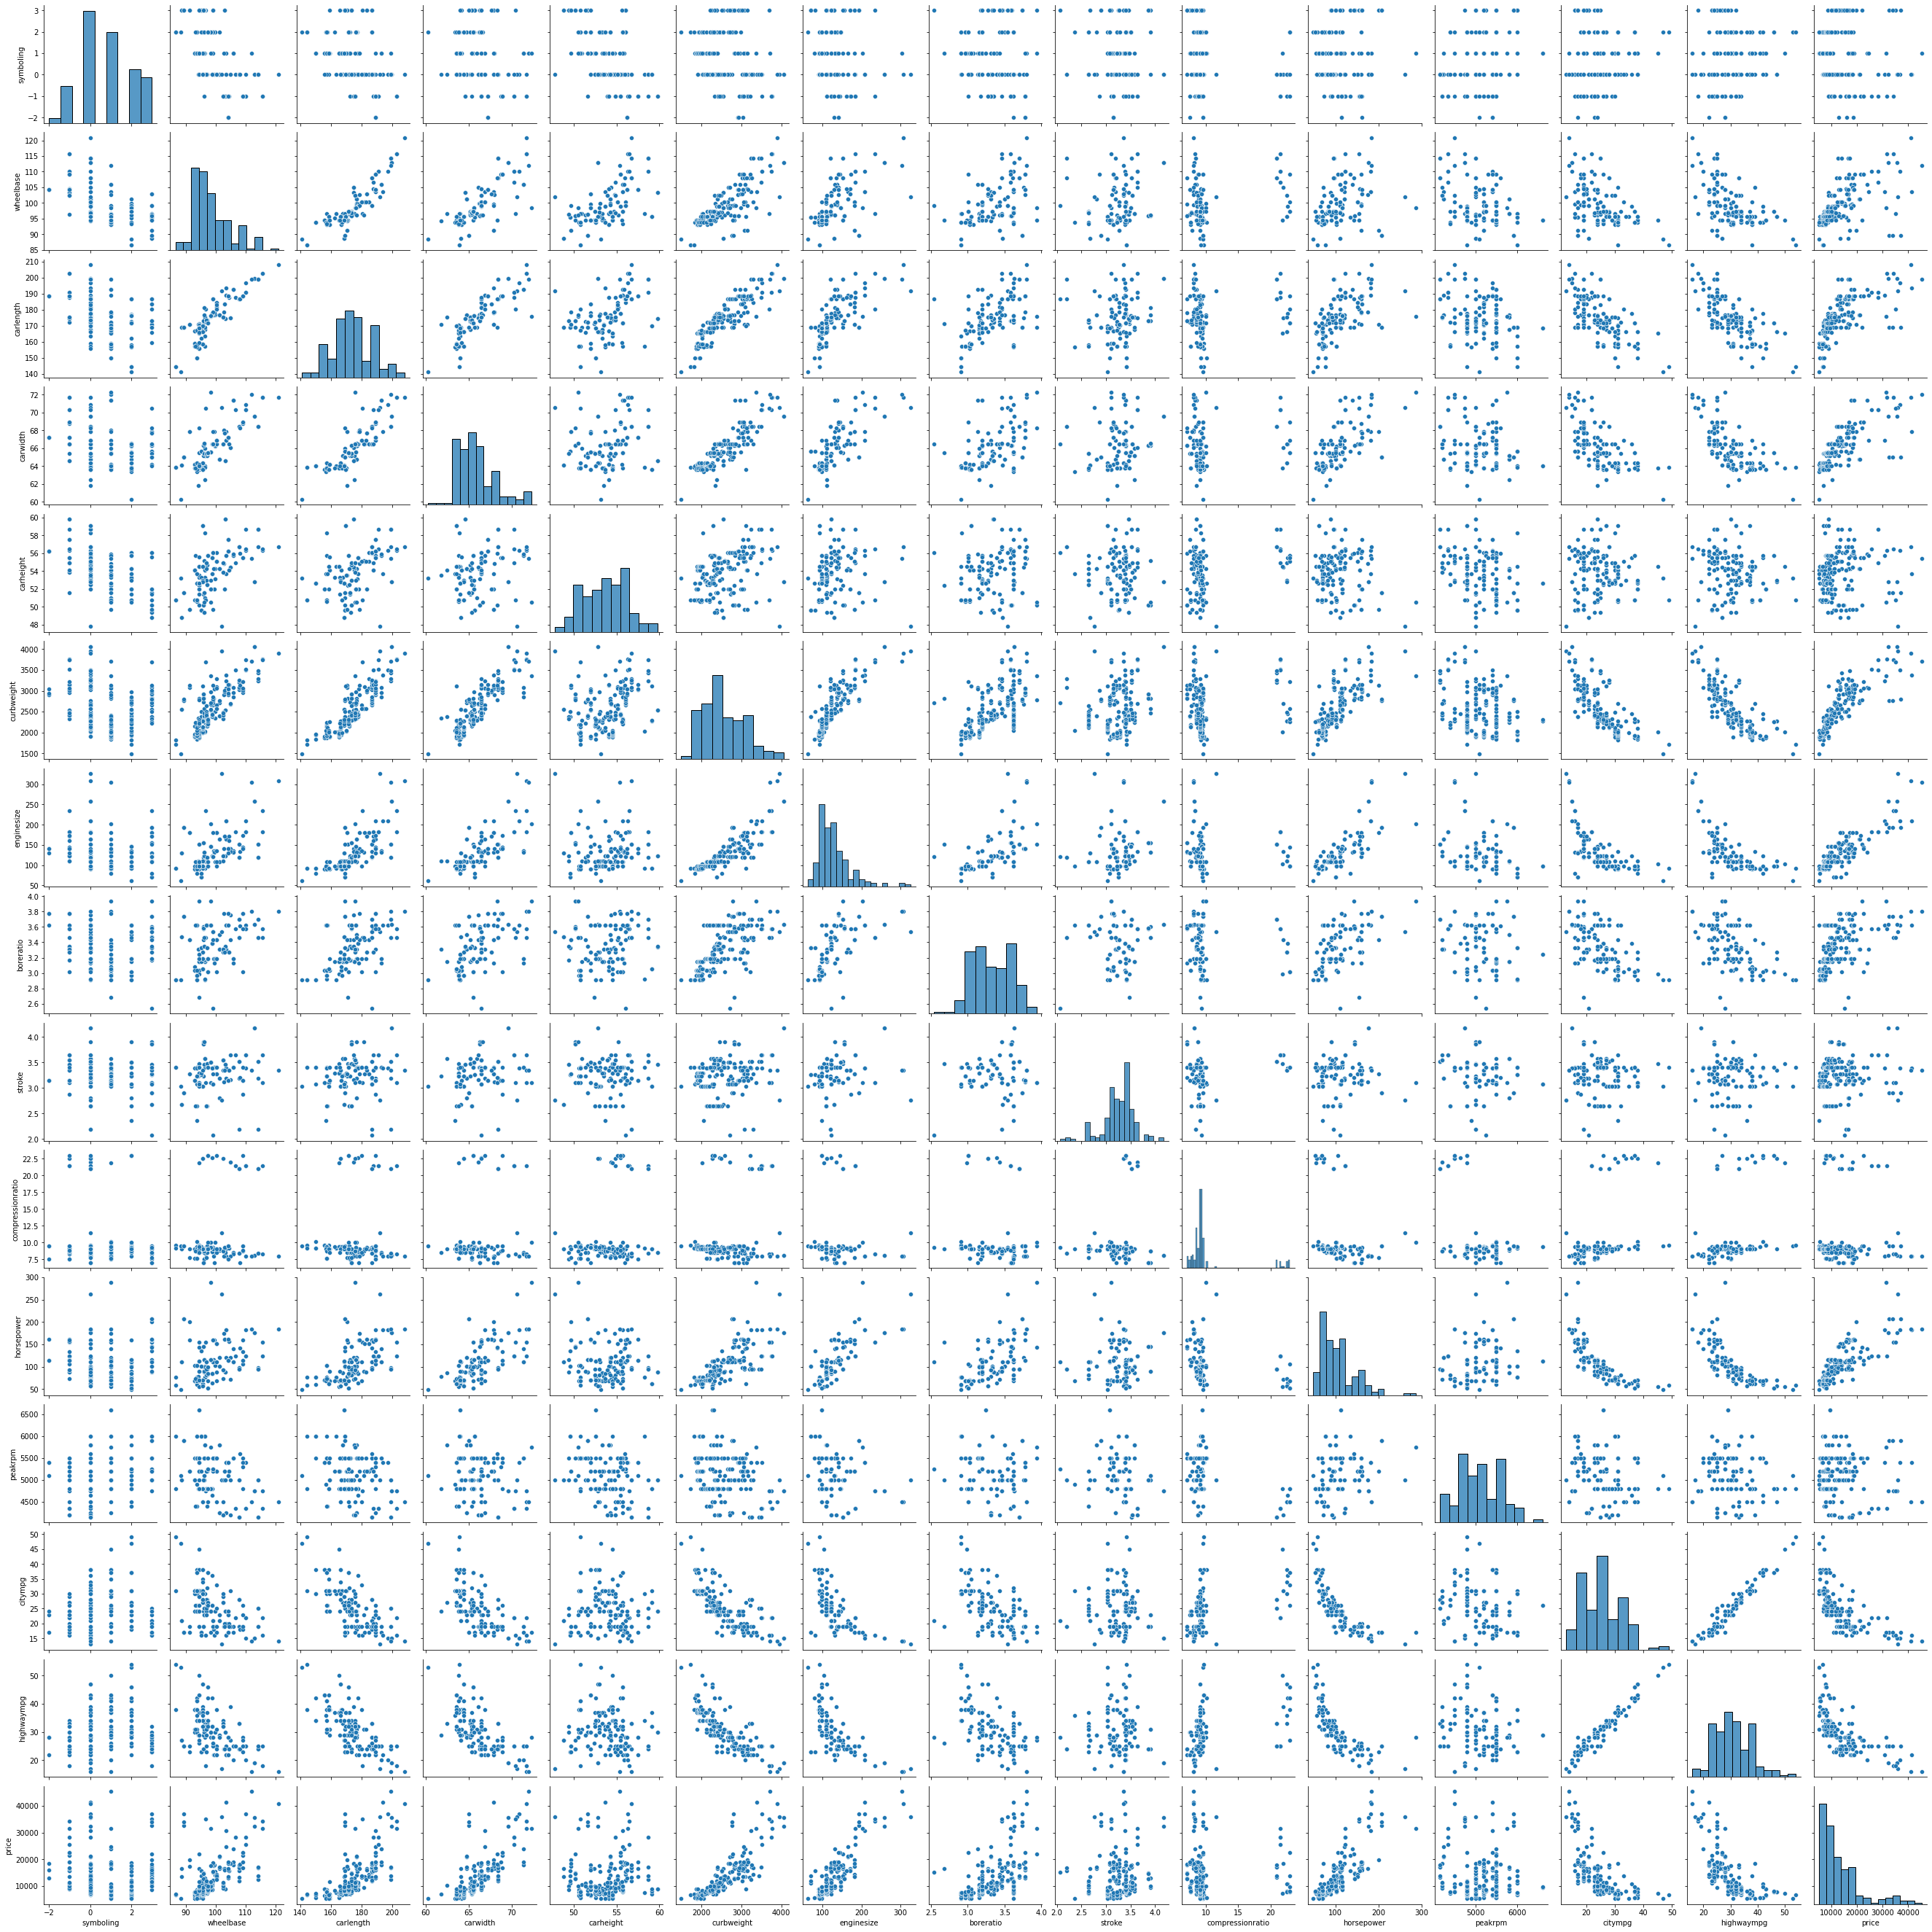

In [27]:
# Grade de graficos com as relação entre variaveis
sns.pairplot(cars)
plt.show()

In [28]:
cars[['fueltype', 'aspiration', 'doornumber', 'carbody', 'cylindernumber']]

,fueltype,aspiration,doornumber,carbody,cylindernumber
car_ID,,,,,
1,gas,std,two,convertible,four
2,gas,std,two,convertible,four
3,gas,std,two,hatchback,six
4,gas,std,four,sedan,four
5,gas,std,four,sedan,five
...,...,...,...,...,...
201,gas,std,four,sedan,four
202,gas,turbo,four,sedan,four
203,gas,std,four,sedan,six


Importante levantar que a regressão linear, seja ela simples ou múltipla, só suporta valores númericos. Dessa forma devemos tratar os dados categóricos da nossa base. Para isso vamos utilizar a função [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html), onde esta função transforma as variáveis categóricas em diversas colunas no DataFrame para cada uma das opções de categoria:

In [36]:
# aplica o get dummies no dataset
cars_dummies = pd.get_dummies(cars,
                              prefix_sep='_',
                              columns = ['fueltype', 
                                         'aspiration', 
                                         'doornumber', 
                                         'carbody', 
                                         'cylindernumber'],
                              drop_first = True)

In [37]:
#Shape do dataset
cars_dummies.shape

(205, 29)

In [38]:
# Vamos dar uma olhada no que aconteceu com a base
cars_dummies.head()

,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,1,0,0,0,0
2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,1,0,0,0,0
3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,1,0,0,0,0,1,0,0,0
4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,1,0,0,1,0,0,0,0
5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,1,0,1,0,0,0,0,0


Preparado a base, primeiro passo **importante** para podermos usar os dados no modelo é separar o dados em base de treino e teste (ou em alguns casos validação), onde a divisão fica da seguinte forma:
- **X :** todos os dados dispovínel sobre a dado que utilizamos exceto a resposta;
- **y :** Variável de resposta da nossa base.

In [39]:
# Separa no X e y
X = cars_dummies.drop(['CarName', 'price'], axis = 1)
y = cars_dummies['price']

Vamos utilizar para a separação da base em treino e teste a função [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), onde os parâmetros da função que mais iremos utlizar são:
- **test_size:** Defini a porcentagem que será separada para a base de teste;
- **random_state:** Seed de aleatoriadade, para garantir a reprodutibilidade.

In [40]:
# carrega o train test split
from sklearn.model_selection import train_test_split

In [41]:
# separa a nase em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3, #tamanho da base de teste
                                                    random_state = 42)

Para regressões Lineares e modelos baseados em distância é necessário trazer todos os dados para uma mesma escala, onde a ordem de grandeza dos dados não influencie o modelo. Dessa forma, utilizado da __normalização__ (ou seja trazer os dados para a base do _Z-Score_):

In [42]:
#Carrega a função
from sklearn.preprocessing import StandardScaler

In [43]:
# instanciar a classe do StandardScaler
scaler = StandardScaler()

In [44]:
# Transformação dos dados
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

Para o caso da Regressão Linear Múltipla, iremos utilizar a biblioteca do Scikit-Learn chamada [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linearregression#sklearn.linear_model.LinearRegression):

In [45]:
# Carrega a função do Sklearn
from sklearn.linear_model import LinearRegression

In [46]:
# Instancia o modelo
model = LinearRegression()

In [47]:
# Fit dos dados (ou seja, vamos passar os dados para o modelo aprender com eles)
model.fit(X_train_std, y_train)

LinearRegression()

In [48]:
# Para os dados novos, vamos definir a predição para a base de teste
y_pred = model.predict(X_test_std)

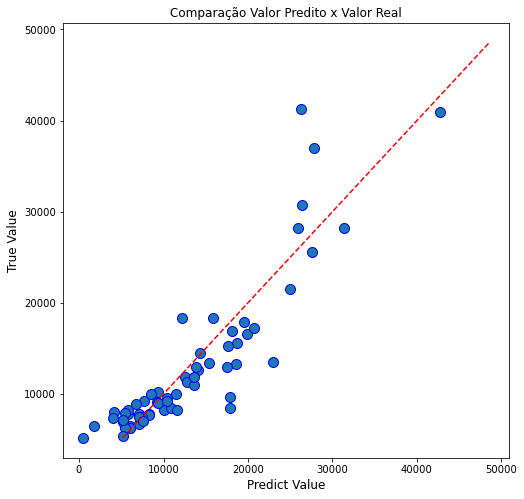

In [49]:
# Vamos criar um gráfico para comparar os Valores Reais com os Preditos
fig = plt.figure(figsize=(8,8))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')
plt.show()

Vamos calcular o R2 para o modelo, importando a métrica [r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) diretamente do Scikit_Learn.

In [50]:
# carrega a função para o R2 Score
from sklearn.metrics import r2_score

# Calcula o R2 score
R2 = r2_score(y_test, y_pred)

# Print do valor do R2
print('R2: ', R2)

R2:  0.7923035443884641


Algo interessante que podemos fazer com o modelo é definir quais variáveis são as mais relevantes na hora da predição dos valores, ou seja quais variáveis têm maiores coeficientes. Esse processo é muito recorrente em Machine Learning e é chamado de **Feature Importance**.

In [51]:
# Coeficientes betas para a regressão
coefs = model.coef_
coefs

array([-1.08543917e+02,  7.61830841e+02, -9.21638137e+02,  9.81864334e+02,
        4.80461347e+02,  1.24332914e+03,  5.31535143e+03, -3.65907568e+02,
       -1.06057447e+03,  2.92453052e+03,  2.14412999e+02,  9.59966507e+02,
       -1.54901020e+03,  1.04752527e+03,  2.70026523e+03,  8.72889512e+02,
       -3.36005688e+01,  3.16371837e+02, -1.74305143e+03, -1.32571801e+03,
       -1.68152304e+03,  2.33114006e+02, -7.11672785e+02, -4.31902593e+02,
       -6.82121026e-13, -1.06168693e+03,  6.96098998e+02])

In [52]:
# cria algumas listas auxiliares
list_columns = X_train.columns
list_feature = []
list_score = []

# loop para vincular o nome da feature com o respectivo coeficiente
for i, v in enumerate(coefs):
    list_feature.append(list_columns[i])
    list_score.append(v)

In [53]:
# Cria um dicionario das Features
dictionary = {'Features': list_feature,
              'Scores':   list_score}

In [54]:
# Mostra a tabela ordenada
df = pd.DataFrame(dictionary)
df.head()

,Features,Scores
0,symboling,-108.543917
1,wheelbase,761.830841
2,carlength,-921.638137
3,carwidth,981.864334
4,carheight,480.461347


In [55]:
# ordena os coeficientes
df = df.sort_values(by = ['Scores'], ascending = False)
df

,Features,Scores
6,enginesize,5.315351e+03
9,compressionratio,2.924531e+03
14,fueltype_gas,2.700265e+03
5,curbweight,1.243329e+03
13,highwaympg,1.047525e+03
3,carwidth,9.818643e+02
11,peakrpm,9.599665e+02
15,aspiration_turbo,8.728895e+02
1,wheelbase,7.618308e+02
26,cylindernumber_two,6.960990e+02


## 

## Variáveis Não Lineares

Notem que o modelo não precisa ter termos lineares em X, mas apenas nos parâmetros necessitam ser linearers. Por exemplo, modelo abaixo ainda é linear nos parâmetros: $$y = \beta_0 + \beta_1 x + \beta_2 x^2$$

In [56]:
# conjunto de dados
x = np.array([2, 4, 6, 8, 10, 12, 14, 16])
y = np.array([21, 16, 15, 13, 14, 16, 21, 26])

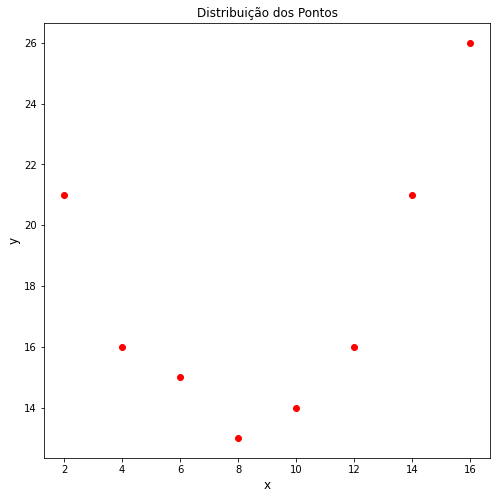

In [57]:
# plot da curva
plt.figure(figsize=(8,8))
plt.plot(x,y, 'ro')
plt.title('Distribuição dos Pontos', fontsize=12)
plt.ylabel("y", fontsize=12)
plt.xlabel("x", fontsize=12)
plt.show()

O macete para usar Regressão Linear para a predição com variáveis não lineares é fazermos uma transformação linear dos valores de X.

In [58]:
# Carrega a função PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

In [60]:
x = x.reshape((-1, 1))

print("dados originais: \n", x)

dados originais: 
 [[ 2]
 [ 4]
 [ 6]
 [ 8]
 [10]
 [12]
 [14]
 [16]]


In [61]:
# Define a transformação nos dados
transf = PolynomialFeatures(degree = 2,
                            include_bias = False)

transf.fit(x)

PolynomialFeatures(include_bias=False)

In [62]:
# transforma os dados incluindo uma nova coluna com valores quadráticos
trans_x = transf.transform(x)

# Print dos dados transformados
print("dados transformados: \n", trans_x)

dados transformados: 
 [[  2.   4.]
 [  4.  16.]
 [  6.  36.]
 [  8.  64.]
 [ 10. 100.]
 [ 12. 144.]
 [ 14. 196.]
 [ 16. 256.]]


In [63]:
# Instancia o modelo
model = LinearRegression()

In [64]:
# Fit do modelo
model.fit(trans_x, y)

LinearRegression()

In [65]:
# Predict do modelo
y_pred = model.predict(trans_x)

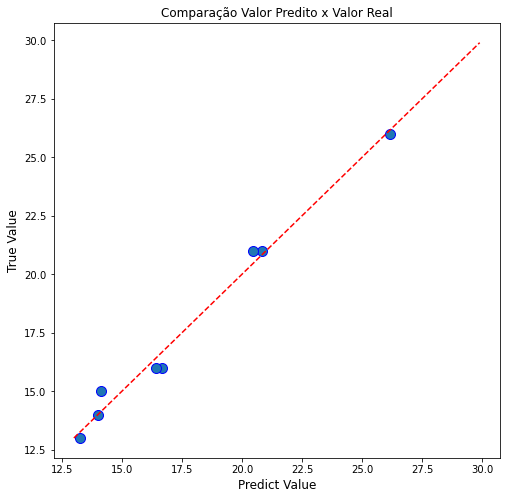

In [66]:
# Gera o gráfico dos valores Preditos pelo Real
fig = plt.figure(figsize=(8,8))
l = plt.plot(y_pred, y, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

# mostra a reta diagonal, que representa a predição perfeita
xl = np.arange(min(y), 1.2*max(y),(max(y)-min(y))/10)
yl = xl
plt.plot(xl, yl, 'r--')
plt.show()

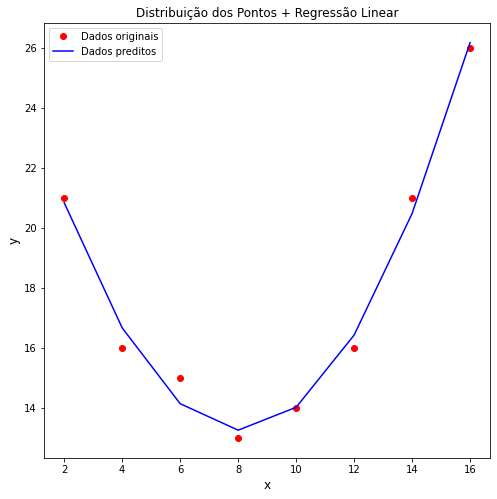

In [67]:
# Plot da curva original e a regressão que aproxima
plt.figure(figsize=(8,8))
plt.plot(x,y, 'ro', label='Dados originais')
plt.plot(x,y_pred, 'b-', label = 'Dados preditos')
plt.title('Distribuição dos Pontos + Regressão Linear')
plt.ylabel("y", fontsize=12)
plt.xlabel("x", fontsize=12)
plt.legend()
plt.show()

In [68]:
# Calculo e print do R2
R2 = r2_score(y, y_pred)
print('R2:', R2)

R2: 0.9873698583376003


## 

## Exercícios

__1)__ O arquivo fish.csv consiste em um dataset com registro de características de 7 espécies diferentes de peixes comuns nas vendas do mercado de peixes. Com este conjunto de dados, um modelo de Regressão Linear para estimar o peso (Weight) dos peixes.

Não esqueça de explorar os dados, realizar o tratamento dos dados (analise o tipo dos dados, por exemplo), fazer a separação dos dados de treino e teste; e, por fim, avaliar a precisão do seu modelo.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
# Carrega o CSV
fish = pd.read_csv('./datasets/fish.csv')

In [ ]:
# Mostra os primeiros dados
fish.head()

## 

__2)__ O arquivo usa_housing.csv consiste em um dataset que contém informações sobre o preço de casas em determinadas regiões dos Estados Unidos. Uma descrição das colunas desse dataframes é apresentada abaixo:

- __Avg. Area Income:__ Média da renda dos residentes de onde a casa está localizada.
- __Avg. Area House Age:__ Média de idade das casas da mesma cidade.
- __Avg. Area Number of Rooms:__ Número médio de quartos para casas na mesma cidade.
- __Avg. Area Number of Bedrooms:__ Número médio de quartos para casas na mesma cidade.
- __Area Population:__ A população da cidade onde a casa está localizada.
- __Price:__ Preço de venda da casa.
- __Address:__ Endereço da casa.

Utilize os dados contidos nele para criar um modelo de regressão linear que seja capaz de estimar o preço de venda das casas.

In [ ]:
# Carrega o CSV
houses = pd.read_csv('./datasets/usa_housing.csv')

In [ ]:
# Mostra os primeiros resultados
houses.head()

## 